In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix, identity

boxes = [(69,111),
             (69,264),
             (138,12),
             (138,165),
             (192,111),
             (192,264),
             (261,12),
             (261,165)]
    
rects = [(138,51),(138,204),
             (261,51),(261,204)]
    
L_shape = [(69,12),(69,165),
               (192,12),(192,165)]

def is_in_box(box_x, box_y, x, y):
    return (box_x < x and x < box_x+18 and box_y < y and y < box_y+18)

def is_in_rect(rect_x, rect_y, x, y):
    return (rect_x < x and x < rect_x+18 and rect_y < y and y < rect_y+78) or (rect_x-12 < x and x < rect_x+1 and rect_y+60 < y and y < rect_y+78)

def is_in_L_shape(l_x, l_y, x, y):
    return (l_x < x and x < l_x+18 and l_y < y and y < l_y+78) or (l_x < x and x < l_x+24 and l_y < y and y < l_y+18)

def is_in_house(x,y):
    for box in boxes:
        if is_in_box(box[0],box[1],x,y):
            return True

    for l in L_shape:
        if is_in_L_shape(l[0],l[1],x,y):
            return True

    for rect in rects:
        if is_in_rect(rect[0],rect[1],x,y):
            return True

    return False

def check_edge(x,y):
    if is_in_house(x,y):
        return True
    if x>299 or y>299 or y == 0:
        return True

    return False

def crossSchema():
    n = 300
    N = n**2
    k = 0.5
    h = 1/n
    tau = (h**2)/(4*k)
    lambda1 = 1.0
    lambda2 = 0
    steps = 80000

    x = np.zeros((N, 1))
    
    for i in range(300):
        x[300*i,0]=1

    A = lil_matrix((N, N))

    b = np.zeros(N)

    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    u0 = 1-4*(tau*k)/(h**2)
    u = [tau*(k/(h**2)-lambda1/(2*h)),
            tau*(k/(h**2)+lambda1/(2*h)),
            tau*(k/(h**2)-lambda2/(2*h)),
            tau*(k/(h**2)+lambda2/(2*h))]

    for i in range(0, n): 
        for e in range(0, n):
            ind = i * n + e
            A[ind, ind] = u0
            for j in range(0, 4):
                x1 = i + dx[j]
                y1 = e + dy[j]
                uj = u[j]
                
                if x1==0:
                    b[ind] -= uj
                elif check_edge(x1,y1):
                    A[ind, ind] += uj
                else:
                    A[ind, x1*300+y1] = uj

    A = csr_matrix(A)
    b = b.reshape(N, -1)
    eps = 1e-8
    for i in range(steps):
        x_new = (A * x + b)
        error = np.max(np.abs(x_new - x))
        if error < eps:
            break
        x = x_new
    return x.reshape((300,300))

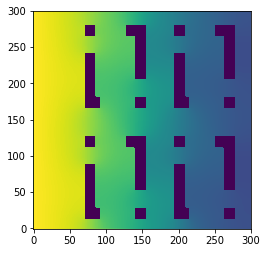

In [6]:
x_res = crossSchema()
plt.imshow(1-x_res.T)
plt.gca().invert_yaxis()
plt.show()